In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
visa_df=pd.read_csv(r"C:\Users\RavindharRajula\NareshIT\Data_set_files\Visadataset.csv")
visa_df.head(2)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified


In [3]:
cat_cols=visa_df.select_dtypes(include='object').columns.tolist()
cat_cols

['case_id',
 'continent',
 'education_of_employee',
 'has_job_experience',
 'requires_job_training',
 'region_of_employment',
 'unit_of_wage',
 'full_time_position',
 'case_status']

In [4]:
num_cols=visa_df.select_dtypes(exclude='object').columns.tolist()
num_cols

['no_of_employees', 'yr_of_estab', 'prevailing_wage']

In [5]:
# reading prevailig_wage columns
pre_wag=visa_df['prevailing_wage']
pre_wag

0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25475     77092.5700
25476    279174.7900
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: prevailing_wage, Length: 25480, dtype: float64

In [6]:
np.min(pre_wag)   # min(pre_wag)   # pre_wage.min()

2.1367

In [7]:
np.max(pre_wag)

319210.27

In [8]:
np.mean(pre_wag)

np.float64(74455.81459209183)

In [9]:
len(pre_wag)

25480

### Percentile & Quantile

In [10]:
#25 percent
np.percentile(pre_wag,25)

np.float64(34015.479999999996)

In [11]:
np.quantile(pre_wag,0.25)

np.float64(34015.479999999996)

In [12]:
np.quantile(pre_wag,0.5),np.quantile(pre_wag,0.75)

(np.float64(70308.20999999999), np.float64(107735.51250000001))

In [13]:
count=len(pre_wag)
Min=np.min(pre_wag)
per_25=np.percentile(pre_wag,25)
mean=np.mean(pre_wag)
median=np.median(pre_wag)
per_50=np.percentile(pre_wag,50)
per_75=np.percentile(pre_wag,75)
Max=np.max(pre_wag)
ID=['count','Min','per_25','mean','median','per_50','per_75','Max']
metric=[count,Min,per_25,mean,median,per_50,per_75,Max]

In [14]:
pd.DataFrame(metric,ID,columns=['Values'])

,Values
count,25480.000000
Min,2.136700
per_25,34015.480000
mean,74455.814592
median,70308.210000
per_50,70308.210000
per_75,107735.512500
Max,319210.270000


In [15]:
l=[]
for col in num_cols:
    cols=visa_df[col]
    count=len(cols)
    Min=np.min(cols)
    per_25=np.percentile(cols,25)
    mean=np.mean(cols)
    median=np.median(cols)
    per_50=np.percentile(cols,50)
    per_75=np.percentile(cols,75)
    Max=np.max(cols)
    metrics=[count,Min,per_25,mean,median,per_50,per_75,Max]
    l.append(metrics)
ID=['count','Min','per_25','mean','median','per_50','per_75','Max']


In [16]:
pd.DataFrame(l,index=num_cols,columns=ID)

,count,Min,per_25,mean,median,per_50,per_75,Max
no_of_employees,25480,-26.0000,1022.00,5667.043210,2109.00,2109.00,3504.0000,602069.00
yr_of_estab,25480,1800.0000,1976.00,1979.409929,1997.00,1997.00,2005.0000,2016.00
prevailing_wage,25480,2.1367,34015.48,74455.814592,70308.21,70308.21,107735.5125,319210.27


In [17]:
l=[]
for cols in num_cols:
    col=visa_df[cols]
    count=len(col)
    Min=np.min(col)
    per_25=np.percentile(col,25)
    mean=np.mean(col)
    median=np.median(col)
    per_50=np.percentile(col,50)
    per_75=np.percentile(col,75)
    Max=np.max(col)
    metrics=[count,Min,per_25,mean,median,per_50,per_75,Max]
    ID=['count','min','25%','mean','median','50%','75%','max']
    l.append(metrics)

pd.DataFrame(l,index=num_cols,columns=ID)

,count,min,25%,mean,median,50%,75%,max
no_of_employees,25480,-26.0000,1022.00,5667.043210,2109.00,2109.00,3504.0000,602069.00
yr_of_estab,25480,1800.0000,1976.00,1979.409929,1997.00,1997.00,2005.0000,2016.00
prevailing_wage,25480,2.1367,34015.48,74455.814592,70308.21,70308.21,107735.5125,319210.27


In [18]:
visa_df.describe()   # shortcut

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


### percentile
- percentile : The num% of the total data has values less than %percentile_data
- ex :
   - 25p=34015.48
   - there is 25percentile of the total data has wages less than 34015.48
   - what is total data
   - 25 percentage of totaldata
   - 25480*25/100 = 6370
   - means there are 6370 employees have less wages than 34015.48

In [19]:
visa_df[visa_df['prevailing_wage']<=np.percentile(visa_df['prevailing_wage'],25)].shape[0]  #6370 employees have salary < 25%

6370

In [20]:
visa_df[visa_df['prevailing_wage']<=np.percentile(visa_df['prevailing_wage'],50)].shape[0]  #12740 employees have salary < 50%

12740

In [21]:
visa_df[visa_df['prevailing_wage']<=np.percentile(visa_df['prevailing_wage'],75)].shape[0] #19110 employees have salary < 75%

19110

In [22]:
25480*50/100

12740.0

In [23]:
25480*75/100

19110.0

### emperical formula 

In [24]:
mean=visa_df['prevailing_wage'].mean().tolist()
mean

74455.81459209183

In [25]:
std=visa_df['prevailing_wage'].std()
std

52815.94232687357

In [26]:
lb=mean-1*std          #68%
ub=mean+1*std
ub,lb

(127271.7569189654, 21639.872265218262)

In [27]:
visa_df[(visa_df['prevailing_wage']>lb) & (visa_df['prevailing_wage']<ub)].shape[0]

17171

In [28]:
lb2=mean-2*std          #95%
ub2=mean+2*std
ub2,lb2
visa_df[(visa_df['prevailing_wage']>lb) & (visa_df['prevailing_wage']<ub)].shape[0]==25480*95/100

False

In [29]:
lb3=mean-3*std          #99.7%
ub3=mean+3*std
ub3,lb3
visa_df[(visa_df['prevailing_wage']>lb) & (visa_df['prevailing_wage']<ub)].shape[0]==25480*99.7/100

False

- **Emperical rule is valid for Normal Distribution**
- **the above the data does not follows the normal distribution**

### Histogram

(array([6038., 5504., 5681., 4551., 2334.,  624.,  373.,  240.,  114.,
          21.]),
 array([2.13670000e+00, 3.19229500e+04, 6.38437634e+04, 9.57645767e+04,
        1.27685390e+05, 1.59606203e+05, 1.91527017e+05, 2.23447830e+05,
        2.55368643e+05, 2.87289457e+05, 3.19210270e+05]),
 <BarContainer object of 10 artists>)

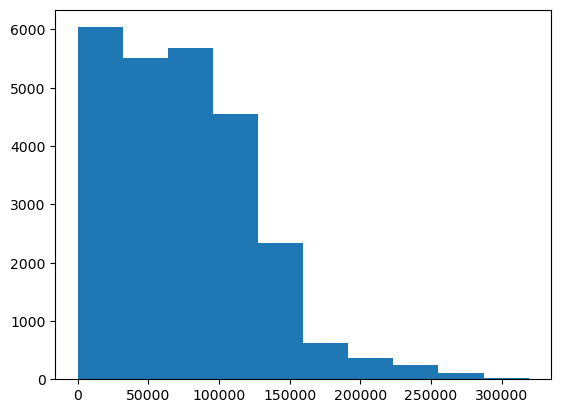

In [30]:
plt.hist(visa_df['prevailing_wage'])      # right skew ,normal distribution fail.

### practise

In [31]:
bank_df=pd.read_csv(r"C:\Users\RavindharRajula\NareshIT\Data_set_files\bank.csv",sep=';')
bank_df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no


In [32]:
# column dividing.
cat_cols=bank_df.select_dtypes(include='object').columns.tolist()
cat_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [33]:
num_cols=bank_df.select_dtypes(exclude='object').columns.tolist()
num_cols

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [34]:
age_data=bank_df['age']

In [35]:
age_data.count().tolist()

4521

In [36]:
age_data.min()

19

In [37]:
np.percentile(age_data,25).tolist()

33.0

In [38]:
age_data.mean().tolist()

41.17009511170095

In [39]:
age_data.median()

39.0

In [40]:
age_data.std()

10.576210958711275

In [41]:
len(age_data)

4521

In [42]:
np.percentile(age_data,50).tolist()

39.0

In [43]:
np.percentile(age_data,75).tolist()

49.0

In [44]:
metric=[]
for col in num_cols:
    age_data=bank_df[col]
    count=age_data.count().tolist()
    Min=age_data.min()
    p25=np.percentile(age_data,25).tolist()
    Mean=age_data.mean().tolist()
    Median=age_data.median()
    std=age_data.std()
    p50=np.percentile(age_data,50).tolist()
    p75=np.percentile(age_data,75).tolist()
    Max=age_data.max()
    metric.append([count,Min,p25,Mean,Median,std,p50,p75,Max])
    ID=['Count','Min','25%','Mean','Median','std','50%','p75','Max']
pd.DataFrame(metric,columns=ID,index=num_cols)

,Count,Min,25%,Mean,Median,std,50%,p75,Max
age,4521,19,33.0,41.170095,39.0,10.576211,39.0,49.0,87
balance,4521,-3313,69.0,1422.657819,444.0,3009.638142,444.0,1480.0,71188
day,4521,1,9.0,15.915284,16.0,8.247667,16.0,21.0,31
duration,4521,4,104.0,263.961292,185.0,259.856633,185.0,329.0,3025
campaign,4521,1,1.0,2.793630,2.0,3.109807,2.0,3.0,50
pdays,4521,-1,-1.0,39.766645,-1.0,100.121124,-1.0,-1.0,871
previous,4521,0,0.0,0.542579,0.0,1.693562,0.0,0.0,25


In [45]:
bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [46]:
bank_df[bank_df['age']<=np.percentile(bank_df['age'],25)].shape[0]  # 1241---33age
bank_df[bank_df['age']<=np.percentile(bank_df['age'],50)].shape[0]  # 2290---39age
bank_df[bank_df['age']<=np.percentile(bank_df['age'],75)].shape[0]  # 3493---49age


3493

In [47]:
ub=bank_df.age.mean()+1*bank_df.age.std()                #68
lb=bank_df.age.mean()-1*bank_df.age.std()
ub,lb
bank_df[(bank_df['age']>lb)&(bank_df['age']<ub)].shape[0]==4521*68/100  

False

In [48]:
ub=bank_df.age.mean()+2*bank_df.age.std()                #95
lb=bank_df.age.mean()-2*bank_df.age.std()
ub,lb
bank_df[(bank_df['age']>lb)&(bank_df['age']<ub)].shape[0]==4521*95/100   

False

In [49]:
ub=bank_df.age.mean()+3*bank_df.age.std()                #99.7
lb=bank_df.age.mean()-3*bank_df.age.std()
ub,lb
bank_df[(bank_df['age']>lb)&(bank_df['age']<ub)].shape[0]==4521*99.7/100 

False

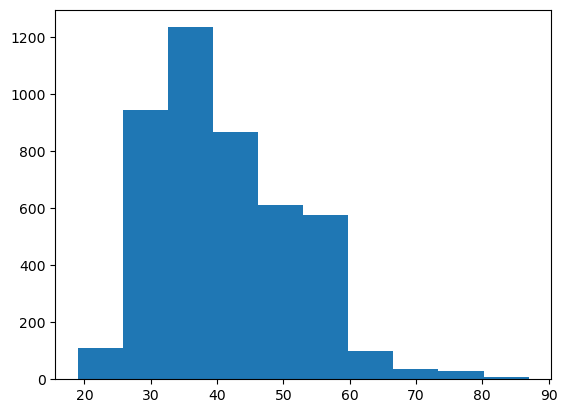

In [50]:
count,val,n=plt.hist(bank_df['age'])
plt.show()

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')


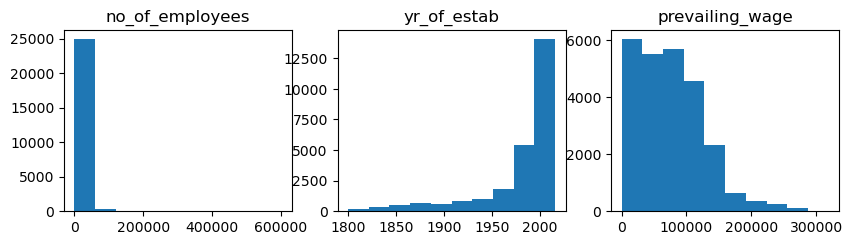

In [51]:
num_columns=visa_df.select_dtypes(exclude='object').columns
cat_columns=visa_df.select_dtypes(include='object').columns
print(num_columns)
plt.figure(figsize=(10,8))
for i,col in enumerate(num_columns,start=1):
    cols=visa_df[col]
    plt.subplot(3,3,i)
    plt.hist(cols)
    plt.title(col)
    

In [52]:
# for one interval we need 2 values
# 10 intervals we need 11 values
# function returns 3 outputs:
    # count of each interval
    # interval values
    # number of intervals.

In [53]:
n

<BarContainer object of 10 artists>

In [54]:
ub=3.19229500e+04
lb=2.13670000e+00

visa_df[(visa_df['prevailing_wage']>=lb) & (visa_df['prevailing_wage']<=ub)].shape[0]

6038

- we understand the **percentile**
- we explore about **emperical rule**
- then **emperical rule** faliled
- that means the data does not follow **normal distribution**
- we also checked with **histogram plot**
- histogram plot also supported our research : data does not follow normality
- it has **right skew** , so that some outliers present
- we need to visualize those **outliers** by using **boxplot**

In [55]:
# assignment -1 
lb  ub   count
2.13 31922 6038


SyntaxError: invalid syntax (3866196736.py, line 2)

{'whiskers': [<matplotlib.lines.Line2D at 0x15f71d26d50>,
 'caps': [<matplotlib.lines.Line2D at 0x15f71d26fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x15f71d26c10>],
 'medians': [<matplotlib.lines.Line2D at 0x15f71d27250>],
 'fliers': [<matplotlib.lines.Line2D at 0x15f71d27390>],
 'means': []}

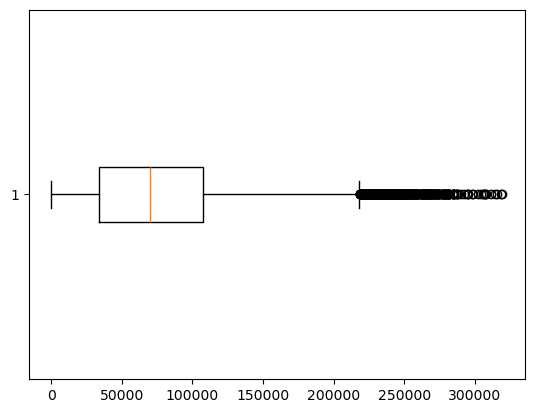

In [65]:
plt.boxplot(visa_df[['prevailing_wage']],orientation='horizontal')

In [66]:
q1=np.quantile(visa_df['prevailing_wage'],0.25).tolist()   #34015.479999999996
q2=np.quantile(visa_df['prevailing_wage'],0.50).tolist()   #70308.20999999999,
q3=np.quantile(visa_df['prevailing_wage'],0.75).tolist()   #107735.51250000001

iqr = q3-q1    #73720.03250000002

lb= q1-1.5*iqr  #-76564.56875000002
ub=q3+1.5*iqr   #218315.56125000003

len(visa_df[(visa_df['prevailing_wage']<lb) | (visa_df['prevailing_wage']>ub)])



427

In [ ]:
q1,q2,q3,iqr,lb,ub

In [68]:
# i want to call the each observation of wage data
# if that observation will be available in this 427(outliers) values
# then that observation will be replaced with median.

outliers_df=visa_df[(visa_df['prevailing_wage']<lb) | (visa_df['prevailing_wage']>ub)]
outliers_list=outliers_df['prevailing_wage'].values.tolist()
outliers_list

[220081.73,
 225569.73,
 247393.01,
 269321.68,
 219529.62,
 232227.33,
 238691.32,
 220448.17,
 230750.48,
 235339.91,
 232680.65,
 256261.78,
 262189.0,
 250510.67,
 218554.78,
 256205.38,
 221944.22,
 229950.7,
 222628.84,
 229819.69,
 233641.72,
 274019.43,
 218982.83,
 230984.28,
 223128.23,
 246705.0,
 240266.34,
 226090.72,
 231949.27,
 254604.08,
 288318.91,
 244457.48,
 242146.48,
 247545.23,
 234139.17,
 231834.72,
 222730.57,
 239773.63,
 220553.95,
 237539.32,
 266440.49,
 277281.01,
 275627.59,
 249291.12,
 292106.59,
 234012.11,
 247009.24,
 267726.09,
 222098.09,
 280661.13,
 277984.52,
 262852.71,
 263877.21,
 230916.64,
 264760.64,
 267868.56,
 222221.67,
 242406.32,
 276894.08,
 281832.93,
 221033.57,
 258292.84,
 223492.85,
 245418.67,
 250289.08,
 271344.69,
 252825.11,
 230843.7,
 253668.86,
 245819.17,
 239465.3,
 236316.36,
 225268.13,
 228941.33,
 306021.96,
 228074.25,
 270799.93,
 221982.69,
 256903.7,
 242813.07,
 253111.05,
 268440.33,
 225681.78,
 233150.41

In [69]:
wage_median=visa_df['prevailing_wage'].median()
wage_data=visa_df['prevailing_wage']
new_data=[]
for val in wage_data:
    if val in outliers_list:
        new_data.append(wage_median)
    else:
        new_data.append(val)
    

In [70]:
new_data

[592.2029,
 83425.65,
 122996.86,
 83434.03,
 149907.39,
 78252.14,
 53635.39,
 418.2298,
 74362.19,
 67514.76,
 83588.56,
 70813.09,
 28663.05,
 107196.03,
 70308.20999999999,
 74108.02,
 3706.79,
 16132.61,
 150441.13,
 79948.12,
 71128.98,
 137694.98,
 45642.39,
 90108.38,
 71286.04,
 99489.65,
 86332.95,
 103029.33,
 40925.86,
 189190.48,
 79594.12,
 135866.13,
 72077.57,
 81921.18,
 70308.20999999999,
 92421.92,
 2490.12,
 110817.26,
 50960.01,
 125336.9,
 39633.32,
 156326.33,
 43630.58,
 54614.42,
 28989.87,
 22924.91,
 61567.75,
 156251.17,
 86022.02,
 49565.37,
 66191.41,
 95623.2,
 115014.05,
 35018.04,
 230.8072,
 113799.64,
 85854.09,
 14174.04,
 47176.84,
 4949.28,
 67410.59,
 58791.58,
 103.2216,
 62591.57,
 102919.59,
 123468.56,
 82324.64,
 5319.49,
 153019.94,
 38059.89,
 230.327,
 61521.92,
 121316.5,
 122540.55,
 47170.76,
 330.3743,
 2927.34,
 107781.48,
 590.0203,
 194176.83,
 102073.81,
 113882.38,
 70778.82,
 84125.48,
 174014.59,
 34213.17,
 79813.05,
 113327.34

(array([4580., 3368., 3890., 4369., 3507., 2860., 1643.,  706.,  295.,
         262.]),
 array([2.13670000e+00, 2.18113840e+04, 4.36206314e+04, 6.54298787e+04,
        8.72391260e+04, 1.09048373e+05, 1.30857621e+05, 1.52666868e+05,
        1.74476115e+05, 1.96285363e+05, 2.18094610e+05]),
 <BarContainer object of 10 artists>)

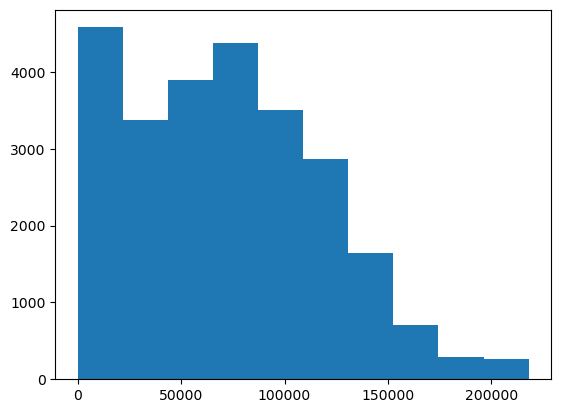

In [71]:
plt.hist(new_data)

{'whiskers': [<matplotlib.lines.Line2D at 0x15f7395cf50>,
 'caps': [<matplotlib.lines.Line2D at 0x15f7395d1d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x15f7395ce10>],
 'medians': [<matplotlib.lines.Line2D at 0x15f7395d450>],
 'fliers': [<matplotlib.lines.Line2D at 0x15f7395d590>],
 'means': []}

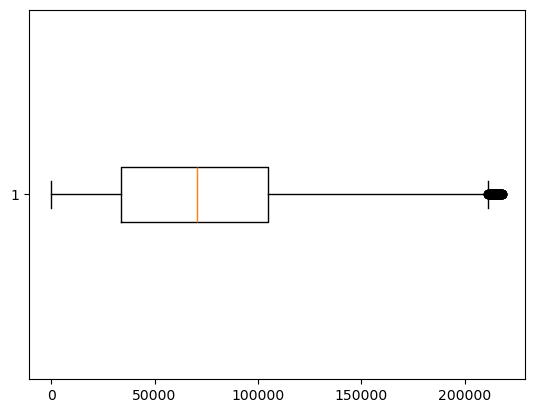

In [72]:
plt.boxplot(new_data,vert=False)

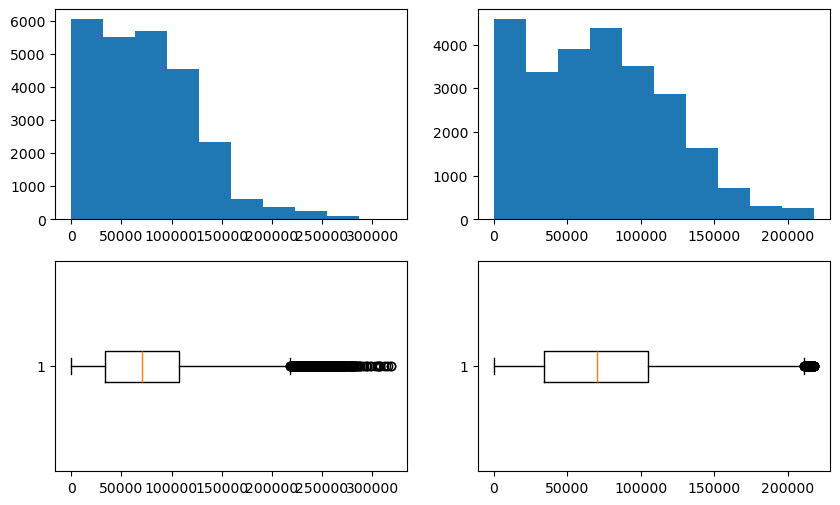

In [73]:
plt.figure(figsize=(10,6))
plt.subplot(2,2,1).hist(visa_df['prevailing_wage'])
plt.subplot(2,2,2).hist(new_data)
plt.subplot(2,2,3).boxplot(visa_df['prevailing_wage'],vert=False)
plt.subplot(2,2,4).boxplot(new_data,vert=False)
plt.show()

### Winsorization

- what ever the outliers less than lb fill with lb
- what ever the outliers greater than ub fill with ub
- in numpy we have a method **clip** 

In [74]:
# 1. get the wage data values
wage_data=visa_df['prevailing_wage'].values.tolist()
# 2. calculate lb
q1=np.percentile(wage_data,25)
q2=np.percentile(wage_data,50)
q3=np.percentile(wage_data,75)

iqr = q3-q1

lb= q1-1.5*iqr
# 3. calculate ub
ub= q3+1.5*iqr

# 4. understand 'clip' method and implement it
new_d=np.clip(wage_data,min=lb,max=ub)
# 5. after this visualize same as before.



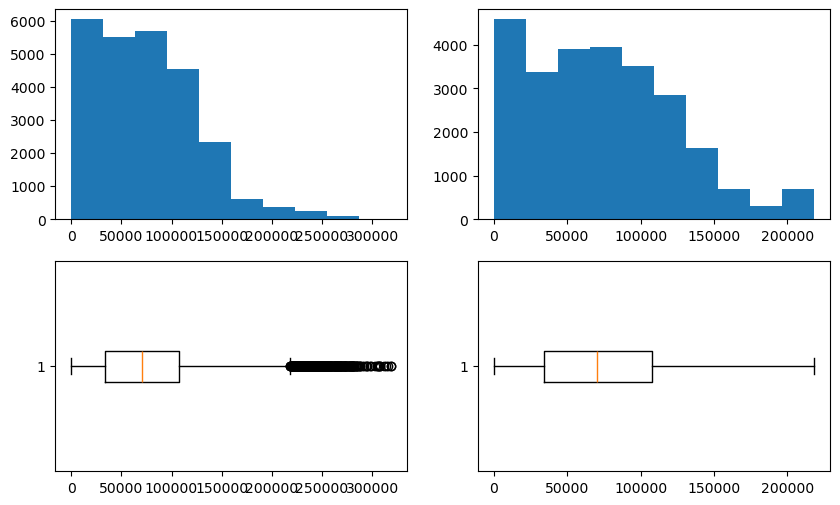

In [76]:
plt.figure(figsize=(10,6))
plt.subplot(2,2,1).hist(wage_data)
plt.subplot(2,2,2).hist(new_d)
plt.subplot(2,2,3).boxplot(wage_data,vert=False)
plt.subplot(2,2,4).boxplot(new_d,vert=False)
plt.show()

Assignment 

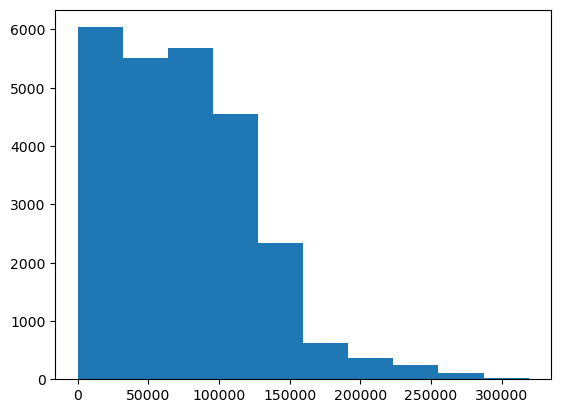

In [56]:
count,values,info=plt.hist(visa_df['prevailing_wage'])

In [57]:
count

array([6038., 5504., 5681., 4551., 2334.,  624.,  373.,  240.,  114.,
         21.])

In [58]:
values

array([2.13670000e+00, 3.19229500e+04, 6.38437634e+04, 9.57645767e+04,
       1.27685390e+05, 1.59606203e+05, 1.91527017e+05, 2.23447830e+05,
       2.55368643e+05, 2.87289457e+05, 3.19210270e+05])

In [64]:
lb=[]
ub=[]
for i in range(len(values)):
    if values[i] != values[-1]:
        lb.append(values[i])
        ub.append(values[i+1])
pd.DataFrame(zip(lb,ub,count),columns=['Lower_bound','Upper_bound','Count'])

,Lower_bound,Upper_bound,Count
0,2.13670,31922.95003,6038.0
1,31922.95003,63843.76336,5504.0
2,63843.76336,95764.57669,5681.0
3,95764.57669,127685.39002,4551.0
4,127685.39002,159606.20335,2334.0
5,159606.20335,191527.01668,624.0
6,191527.01668,223447.83001,373.0
7,223447.83001,255368.64334,240.0
8,255368.64334,287289.45667,114.0
9,287289.45667,319210.27000,21.0
